## Scattering from a coherent source

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

from phenom.gaussian import complex_gaussian_beam
from phenom.utils import e2wav

from transmission_functions import transmission_function_homogeneous
from propagation import fresnel_diffraction
from pinholes import polygon 
from double_pinhole import double_pinhole_interference, fix_experimental_params, fit_pinhole_interference




In [2]:
# Fresnel diffraction parameters
wavelength = 1e-8  # X-ray wavelength in meters (1 Å)
delta = 1e-6  # Real part related to refractive index decrement
beta = 1e-7  # Imaginary part related to absorption
z = 3.5

pinhole_radius = 3e-6
pinhole_separation = 6e-6
inverse = True # gives particle rather than pinhole
n = 2
# Example usage
x = np.linspace(-2.5e-04, 2.5e-04, 1000)
y = np.linspace(-2.5e-04, 2.5e-04, 1000)

X, Y = np.meshgrid(x, y)


In [19]:
### propagate wavefront

psi_i = fresnel_diffraction(psi_i,X,Y,z = 290, wavelength = e2wav(10000))



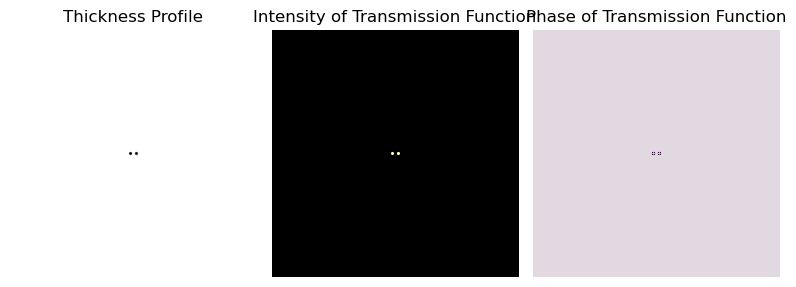

In [3]:

# Create thickness profile for a polygon pattern
thickness = polygon(X, Y, pinhole_radius=pinhole_radius, n=n, pinhole_separation=pinhole_separation, rotation=0, inverse=False)

# Calculate the transmission function
T = transmission_function_homogeneous(thickness, X, Y, wavelength, delta=delta, beta=beta)

# Calculate the intensity and phase of the transmission function
I_t = np.abs(T)**2
phi_t = np.angle(T)

# Define extent for plots
extent = [x.min(), x.max(), y.min(), y.max()]

# Plot the thickness, intensity, and phase of the transmission function
fig, axs = plt.subplots(1, 3, figsize=(8, 4))

axs[0].imshow(thickness, extent=extent, cmap='gray')
axs[0].set_title('Thickness Profile')
axs[0].axis('off')

axs[1].imshow(I_t, extent=extent, cmap='afmhot')
axs[1].set_title('Intensity of Transmission Function')
axs[1].axis('off')

axs[2].imshow(phi_t, extent=extent, cmap='twilight')
axs[2].set_title('Phase of Transmission Function')
axs[2].axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Calculate the incident wavefield
psi_i = complex_gaussian_beam(x, y, photon_energy = 10000, pulse_energy = 1000,
                              sigma = 2e-5,
                              div = 0.5e-07,
                              theta_x=0, theta_y=0, x0=1e-05, y0=0,)

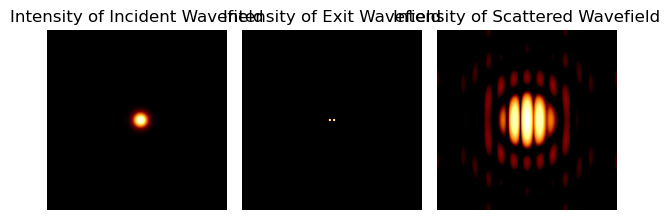

In [5]:
 I_i = abs(psi_i)**2

# Calculate the modified wavefield after interaction with the sample
psi_t = psi_i * T

# Compute the scattered wavefield
psi_s = fresnel_diffraction(psi_t, X, Y, z, e2wav(10000))

# Calculate the intensity of the scattered wavefield
I_s = np.abs(psi_s)**2

# Calculate the intensity of the incident and exit plane wavefields
 

# Define extent for plots
extent = [x.min(), x.max(), y.min(), y.max()]

# Plot the incident and exit plane intensities and the scattered intensity
fig, axs = plt.subplots(1, 3, figsize=(6, 6))

axs[0].imshow(I_i, extent=extent, cmap='afmhot')
axs[0].set_title('Intensity of Incident Wavefield')
axs[0].axis('off')

axs[1].imshow(I_t, extent=extent, cmap='afmhot')
axs[1].set_title('Intensity of Exit Wavefield')
axs[1].axis('off')

axs[2].imshow(I_s, extent=extent, cmap='afmhot', norm=LogNorm(vmin=1e-8, vmax=np.max(I_s)))
axs[2].set_title('Intensity of Scattered Wavefield')
axs[2].axis('off')

plt.tight_layout()
plt.show()

In [6]:
np.min(I_s)

4.935543405835579e-15

In [7]:
### expected double slit pattern

I_expected = double_pinhole_interference(x = x,
                                         gamma = 1,
                                         I1 = 1, I2 = 1,
                                         d = pinhole_separation*2,
                                         w1 = pinhole_radius*2,
                                         w2 = pinhole_radius*2,
                                         z = z,
                                         wav = e2wav(10000), x0 = 0,                                        
                                         )

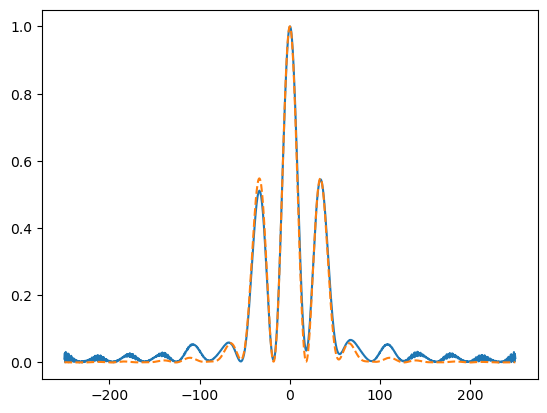

In [8]:
plt.plot(x*1e6, I_s.mean(0)/I_s.mean(0).max())
plt.plot(x*1e6, I_expected/I_expected.max(), linestyle = 'dashed')